# O - Sumário

- Introdução Conceitual
  - Perceptron
  - Modelagem com matrizes
  - Redes Neurais
  - Treinamento
  
- PyTorch
  - Conceitos iniciais
    - Tensores
    - Operações
    - CPU x GPU
  - Redes Neurais
    - Treinamento

# 1 - Introdução Conceitual
**O que é DeepLearning?**
É muito comum a confusão entre as expressões **Inteligência Artificial, Machine Learning e Deep Learning**. Na verdade, são sub-áreas de estudo.
<br>
*Deep Learning Fundamentals: An Introduction for Beginners (Chao Pan)*

# 1.1 - Perceptron (Neurônio Artificial)
Em 1957 foi desenvolvido o **Perceptron** por Frank Rosenblatt. O Perceptron é uma estrutura que se baseia no **Neurônio**, e por isso também é conhecido como **Neurônio Artificial**.
<br>
Os componentes do Perceptron são:
- Input: Valores das features dos dados
- Pesos
- Ativação
- Função

# 1.2 - Modelagem com Matrizes

In [0]:
import numpy as np
import pandas as pd

In [2]:
w = np.matrix([
    [5],
    [-10],
    [0],
    [0]
]) 
print(w) # Pesos

[[  5]
 [-10]
 [  0]
 [  0]]


# Função de Ativação do tipo *Sigmoid*
Nós usamos uma função do tipo sigmoid pois esperar um resultado booleano, como em uma regressão logística.

In [0]:
def activation_function(atctivation):
  return 1/(1+np.exp(-atctivation))

In [0]:
v_activation_function = np.vectorize(activation_function)

In [0]:
def perceptron(x,w):
  a = np.matmul(x,w)
  return v_activation_function(a)

# Step 3: Calculate New Input

In [6]:
df = pd.read_csv('https://bit.ly/dbc-matrix-example')
df

,ft1,ft2,ft3,tg
0,1,2,1,0
1,1,3,4,0
2,0,2,3,1
3,0,2,3,1
4,0,4,4,1


Vamos incicialmente incluir a coluna de 1's (bias) que vimos na modelagem do perceptron

In [7]:
df["ft0"] = 1
df

,ft1,ft2,ft3,tg,ft0
0,1,2,1,0,1
1,1,3,4,0,1
2,0,2,3,1,1
3,0,2,3,1,1
4,0,4,4,1,1


Agora devemos transformar o DataFrame em matriz

In [8]:
columns = ["ft0","ft1","ft2","ft3"]
x = df[columns].values
x

array([[1, 1, 2, 1],
       [1, 1, 3, 4],
       [1, 0, 2, 3],
       [1, 0, 2, 3],
       [1, 0, 4, 4]])

Vamos, por fim, aplicar os dados ao Perceptron e compara-los com os dados reais

In [9]:
w = np.matrix([
    [24],
    [-49],
    [0],
    [0]
]) 
# Coeficiente Regressão Logística
# 24, -49, 0, 0

# predicao/predict
y_hat = perceptron(x,w)
print(y_hat)

[[1.38879439e-11]
 [1.38879439e-11]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]]


In [10]:
# alvo/target
y = df["tg"].values
print(y)

[0 0 1 1 1]


# Step Function
função de ativação **step function** (função que retorna 1 se o valor de entrada é maior que 0, e 0 casos contrário)
<br>
Teste com:
- x = [1,0,1,0] o resultado é 1
- x = [0,1,0,1] o resultado é 0

In [0]:
x = np.matrix([
    [1,0,1,0],
    [0,1,0,1]
])

w = np.matrix([
    [0],
    [-10],
    [2],
    [1]
])

In [12]:
def activation_function(atctivation):
  if atctivation > 0:
    return 1
  else:
    return 0
v_activation_function = np.vectorize(activation_function)

perceptron(x,w)

matrix([[1],
        [0]])

In [13]:
# alvo/target
y = np.matrix([
    [1],
    [0]
])
print(y)

[[1]
 [0]]


# MLP (MultiLayer Perceptron)

In [0]:
w1 = np.matrix([
    [0.5, -0.5],
    [-1,1],
    [1,-1]
])

w2 = np.matrix([
    [1],
    [1]
])

In [0]:
# step function
def activation_function(x):
  if x>0:
    return 1
  return 0

v_act = np.vectorize(activation_function)

In [0]:
def nural_network(x,w1,w2):
  sigma1 = np.matmul(x,w1)
  o1 = v_act(sigma1) # primeira camada
  sigma2 = np.matmul(o1,w2)
  o2 = v_act(sigma2) # segunda camada
  return o2

In [0]:
# inputs
df = pd.DataFrame([
    [0,1,1],
    [0,0,0],
    [1,0,1],
    [1,1,0]
], columns=["x0","x1","x2"])

Faça uma rede neural como a da imagem abaixo e com função de ativação **sigmoid**

In [0]:
w1 = np.matrix([
    [-0.5, -0.5],
    [-1,1],
    [1,-1],
    [1,1]
])

w2 = np.matrix([
    [1,2],
    [2,1]
])

w3 = np.matrix([
    [1],
    [1]
])

In [0]:
# sigmoid
def activation_function(atctivation):
  return 1/(1+np.exp(-atctivation))

v_act = np.vectorize(activation_function)

In [0]:
def nural_network(x,w1,w2,w3):
  sigma1 = np.matmul(x,w1)
  o1 = v_act(sigma1) # primeira camada
  sigma2 = np.matmul(o1,w2)
  o2 = v_act(sigma2) # segunda camada
  sigma3 = np.matmul(o2,w3)
  o3 = v_act(sigma3) # terceira camada
  return o3

In [22]:
x = np.matrix([
    [1,1,0,0],
    [1,0,1,0],
    [1,0,0,1]
])

nural_network(x,w1,w2,w3)

matrix([[0.82274304],
        [0.82274304],
        [0.84970755]])

# Learning Rate

# PyTorch (1.1)

## 2.1 - Conceitos Iniciais
**PyTorch** utiliza tensores para realizar os cálculos das redes neurais
### 2.1.1. - Tensores
**Tensores** podem se comportar como arrays/matrizes, mas podem ter mais dimensões e se aproveitam de GPUs para acelerar seu processamento. (multidimensional array)

Maneiras de criar tensores:
- Tensor vazio

In [23]:
import torch

empty_tensor = torch.empty
empty_tensor

<function _VariableFunctions.empty>

- Tensor randômico

In [24]:
random_tensor = torch.rand(5,3)
random_tensor

tensor([[0.8887, 0.8948, 0.6751],
        [0.4963, 0.2848, 0.7442],
        [0.5059, 0.8216, 0.9694],
        [0.8390, 0.3772, 0.5189],
        [0.9641, 0.8361, 0.5982]])

- Tensor zero

In [25]:
zeros_tensor = torch.zeros(5,3)
zeros_tensor

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

- Tensor baseado em array/matriz

In [26]:
data_tensor = torch.tensor([
    [1,2,3],
    [4,5,6],
    [7,8,9]
])
data_tensor

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

Quando criamos

In [27]:
data_tensor_float = torch.tensor([
    [1,2,3],
    [4,5,6],
    [7,8,9]
], dtype=torch.float)
data_tensor_float

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

### 2.2.2 - Operações
Existem várias maneiras de escrever operações entre tensores

In [0]:
# Retorna um erro (diferente tipos)
#empty_tensor + data_tensor_float

Além das validações de tamanhos entre tensores para aplicar as operações, há também uma validação de tipo entre tensores. Em certos casos, é necessário realizar a conversão de tipos.

In [28]:
torch.matmul(data_tensor, data_tensor)

tensor([[ 30,  36,  42],
        [ 66,  81,  96],
        [102, 126, 150]])

In [29]:
data_tensor.matmul(data_tensor)

tensor([[ 30,  36,  42],
        [ 66,  81,  96],
        [102, 126, 150]])

### 2.2.3 - CPU x GPU (CUDA)
Vimos na introdução que o diferencial do tensor é a possibilidade de realizar operações na GPU.
<br>
<br>
Para isso, devemos registrar de alguma maneira que o tensor esta na GPU

In [30]:
torch.cuda.is_available()
# Runtime -> Change runtime -> Hardware Accelarator -> GPU

True

In [0]:
cuda_tensor = torch.tensor([
    [1,2,3],
    [4,5,6],
    [7,8,9]
], device="cuda", dtype=torch.float)

In [34]:
cuda_tensor

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]], device='cuda:0')

Vamos ver o que acontece quando realizamos operações de tensores em devices diferentes

In [0]:
# torch.matmul(cuda_tensor, data_tensor_float)

A operação não consegue ser realizada
<br>
**É importante em nosssos projetos manternos em mente que os tensores devem estar todos no mesmo device durante as operações**
<br>
PAra isso, em certos casos, iremos precisar transferir os tensores de devices

In [37]:
cuda_data_tensor_float = data_tensor_float.to("cuda")
torch.matmul(cuda_tensor, cuda_data_tensor_float)

tensor([[ 30.,  36.,  42.],
        [ 66.,  81.,  96.],
        [102., 126., 150.]], device='cuda:0')

# Rede Neural
Os tensores e operações são a base para a criação das Rendes Neurais, entretando o PyTorch abstrai grande parte da complexidade de programar essas operações.
<br>
<br>
Vamos ver abaixo qual a maneira mais ismples de definir com o PyTorch uma MLP

In [0]:
from torch import nn

In [71]:
nn.Linear(6,4)

Linear(in_features=6, out_features=4, bias=True)

In [42]:
first_mlp = nn.Sequential(
    nn.Linear(6,4), # entrada e saída de neuronios
    nn.Sigmoid(), # ativação
    nn.Linear(4,1), # entrada e saída de neuronios
    nn.Sigmoid() # ativação
)
first_mlp

Sequential(
  (0): Linear(in_features=6, out_features=4, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=4, out_features=1, bias=True)
  (3): Sigmoid()
)

In [44]:
df = pd.read_csv('http://bit.ly/dbc-dataset-deep')
df.head()

,rooms,size,security,distance,age,prices,sold
0,0.037996,-0.560459,-1.028421,0.930462,0.673584,-0.935622,1
1,0.826064,0.231114,1.554438,-1.064012,-1.632073,1.439086,0
2,-0.750071,-0.409999,0.259490,-0.210653,-1.306517,-0.476055,1
3,0.037996,-0.548556,-0.518156,0.600963,0.906119,-0.986552,1
4,0.826064,1.278603,1.030066,-1.333329,-1.701700,0.739330,1


In [46]:
df.shape

(1120, 7)

A coluna **sold** é nossa variável alvo. Então devemos separar os atributos do dataset

In [0]:
x = df.drop(columns="sold")
y = df[["sold"]]

Iremos aplicar agora os dados de x para ver a predição do modelo

In [0]:
x_tensor = torch.tensor(x.values, dtype=torch.float)
y_tensor = torch.tensor(y.values, dtype=torch.float)

In [52]:
# predição
predict = first_mlp(x_tensor)
predict

tensor([[0.5053],
        [0.5372],
        [0.5209],
        ...,
        [0.5009],
        [0.5476],
        [0.5279]], grad_fn=<SigmoidBackward>)

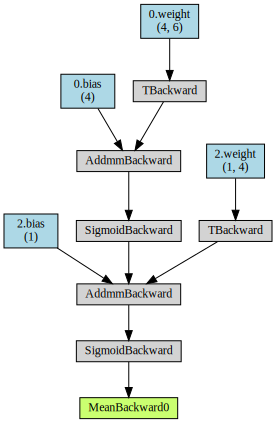

In [55]:
#! pip install torchviz
from torchviz import make_dot
make_dot(predict.mean(), params=dict(first_mlp.named_parameters()))

## 2.2.1 - Treinamento

In [0]:
optm = torch.optim.RMSprop(first_mlp.parameters(), lr=0.001) # learning rate

Em seguida iremos definir qual a função será considerada como métrica de loss/erro. 
<br>
Nesse caso usaremos a **Binary Cross-Entropy** também conhecida como *log loss*
<br>
<br>
Entropia é a medida da incerteza de uma distribuição (grau de desordem). A função entropia cruzada interpreta o sinal de treinaento e as saídas da rede como probabilidades e o algoritmo minimiza a diferença entre estas probabilidades

In [0]:
bce_loss = nn.BCELoss()

Agora podemos definir o fluxo de treinamento
Obs: Para o resultado do modelo é comum utilizarmos a nomenclatura y_hat

In [67]:
# obter o resultado do modelo
y_hat = first_mlp(x_tensor)

# Calcular o erro entre o resultado do modelo e o resultado real
loss = bce_loss(y_hat, y_tensor)
print(loss.item())

# Calcular a direção que os parâmetros devem andar
optm.zero_grad() # zerar para realizar o backprop.
loss.backward()

# Atualizar os parâmetros
optm.step()

0.6798738837242126


Cada vez que executamos essa célula, o erro tende a diminuir. Então, podemos fazer um *for*, que irá ajustar

## Exercício
Faça o processo de treinamento de uma Rede Neural MLP
<br>
A MLP deve ter 6 neurônios na camada de entrada, 4, 3 e 2 neurônios nas camadas ocultas (hidden layer) e 1 output. Utilize a Sigmoid como a ativação em todas as camadas.
<br>
Treine com os mesmos dados do exemplo anterior. Repita o treinamento por 20 vezes (épocas) e mostre o erro com um print a cada repetiçao

In [92]:
mlp = nn.Sequential(
    nn.Linear(6,4), # entrada e saída de neuronios
    nn.Sigmoid(), # ativação
    nn.Linear(4,3), # entrada e saída de neuronios
    nn.Sigmoid(), # ativação
    nn.Linear(3,2), # entrada e saída de neuronios
    nn.Sigmoid(), # ativação
    nn.Linear(2,1), # entrada e saída de neuronios
    nn.Sigmoid() # ativação
)
mlp

Sequential(
  (0): Linear(in_features=6, out_features=4, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=4, out_features=3, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=3, out_features=2, bias=True)
  (5): Sigmoid()
  (6): Linear(in_features=2, out_features=1, bias=True)
  (7): Sigmoid()
)

In [93]:
optm = torch.optim.RMSprop(mlp.parameters(), lr=0.01)

epochs = 20
for i in range(epochs):
  y_hat = mlp(x_tensor)
  loss = bce_loss(y_hat, y_tensor)
  print(loss.item())
  optm.zero_grad() # zerar para realizar o backprop.
  loss.backward()
  optm.step()

0.740048348903656
0.7116854190826416
0.7013381123542786
0.6965513229370117
0.6941251754760742
0.6927487850189209
0.6918179392814636
0.6910398602485657
0.6902562975883484
0.689376711845398
0.6883318424224854
0.6870681643486023
0.6855476498603821
0.6837474703788757
0.681657612323761
0.6792777180671692
0.6766133904457092
0.6736723184585571
0.6704633831977844
0.6669936180114746


In [0]:
from torch.utils.data import DataLoader, TensorDataset

In [0]:
training_dataset = TensorDataset(x_tensor, y_tensor)

In [0]:
data_loader = DataLoader(training_dataset, batch_size=100)

In [90]:
len(y_tensor)

1120

In [94]:
# ele vai iterar de 100 em 100 e no último loop pega o resquício (11*100+20)
for batch_i, batch in enumerate(data_loader):
  batch_x = batch[0] # features
  batch_y = batch[1] # alvos
  
  print(batch_i) # epoca
  print(batch_x.shape) # i observações e j features

0
torch.Size([100, 1])
1
torch.Size([100, 1])
2
torch.Size([100, 1])
3
torch.Size([100, 1])
4
torch.Size([100, 1])
5
torch.Size([100, 1])
6
torch.Size([100, 1])
7
torch.Size([100, 1])
8
torch.Size([100, 1])
9
torch.Size([100, 1])
10
torch.Size([100, 1])
11
torch.Size([20, 1])


## Exercício
Faça o processo de treinamento de uma Rede Neural MLP 
<br>
A MLP deve ter 6 neurônios na camada de entrada, 4, 5 e 4 neurônios nas camadas ocultas (hidden layer) e 1 output. Utilize a Sigmoid como a ativação em todas as camadas. 
<br>
Faça o processo de treinamento com 200 épocas e o tamanho do batch 124. De 20 em 20 épocas, exiba o erro médio da última época excutada.

In [127]:
mlp_three_layers_sigmoid = nn.Sequential(
    nn.Linear(6,4), # entrada e saída de neuronios
    nn.Sigmoid(), # ativação
    nn.Linear(4,5), # entrada e saída de neuronios
    nn.Sigmoid(), # ativação
    nn.Linear(5,4), # entrada e saída de neuronios
    nn.Sigmoid(), # ativação
    nn.Linear(4,1), # entrada e saída de neuronios
    nn.Sigmoid() # ativação
)


data_loader = DataLoader(training_dataset, batch_size=124)
optm = torch.optim.RMSprop(mlp_three_layers_sigmoid.parameters(), lr=0.01)
epochs = 200

losses = []
mean_loss = []

for i in range(epochs):
  mean_loss.append(np.mean(losses))
  losses = []
  for batch in data_loader:
    batch_x = batch[0] # features
    batch_y = batch[1] # alvos
    y_hat = mlp_three_layers_sigmoid(batch_x)
    loss = bce_loss(y_hat, batch_y)
    losses.append(loss.item())
    optm.zero_grad() # zerar para realizar o backprop.
    loss.backward()
    optm.step()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


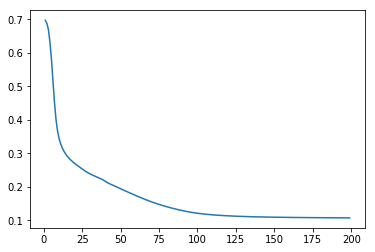

In [128]:
from matplotlib import pyplot as plt

plt.plot(range(len(mean_loss)),mean_loss)

## Exercício
Vamos agora aplicar nosso conhecimento a um dataset que ainda não exploramos. O PyTroch facilita o acesso a esse dataser por ser um dataset muito utilizado em testes de algortimos de machine learning.
<br>
Vamos, a partir de uma imagem de um dígito escrito a mão, descobrir qual é o dígito!

In [129]:
from torchvision import datasets, transforms
from torchvision.transforms.functional import normalize

transform = transforms.Compose([transforms.ToTensor()])
trainset = datasets.MNIST(
    './mnist',
    download=True,
    train=True,
    transform=transform
)
test = datasets.MNIST(
    './mnist',
    download=True,
    train=False,
    transform=transform
)

  0%|          | 0/9912422 [00:00<?, ?it/s]

9920512it [00:00, 21229323.13it/s]                            


Extracting ./mnist/MNIST/raw/train-images-idx3-ubyte.gz


32768it [00:00, 314405.61it/s]                           
0it [00:00, ?it/s]

Extracting ./mnist/MNIST/raw/train-labels-idx1-ubyte.gz


1654784it [00:00, 5335929.15it/s]                           
8192it [00:00, 131080.00it/s]


Extracting ./mnist/MNIST/raw/t10k-images-idx3-ubyte.gz
Extracting ./mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


Vamos ver como podemos visualizar a imagem do dígito

In [0]:
x = trainset.data
y = trainset.targets

5


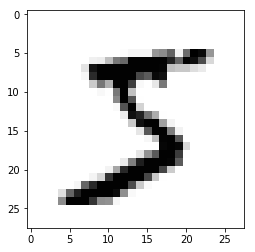

In [131]:
from matplotlib import pyplot as plt
plt.imshow(x[0].data.numpy(), cmap="Greys")
print(y[0].item())

Para facilitar a visualização das imagens, vamos fazer uma função que nos auxilia

In [0]:
def plt_digit(value_tensor, title=''):
  plt.imshow(value_tensor.data.numpy(), cmap="Greys")
  plt.title(title.item())

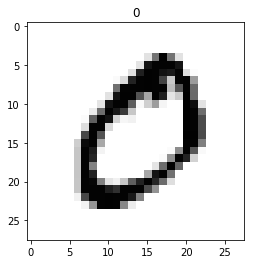

In [133]:
plt_digit(x[1],y[1])

Vamos formatar os dados de acordo com a necessidade

In [134]:
x.shape

torch.Size([60000, 28, 28])

In [135]:
reshaped_x = x.view(-1,28*28)
print(reshaped_x.shape)

torch.Size([60000, 784])


Utilizar o -1 como parâmetro para redimensionalização, significa que ele ajusta automaticamente  o tamanho dessa dimensão.
<br>
Além disso, como já mostramos, não podemos fazer operações entre diferentes tipos, então apesar de ser um escalar, devemos converter o input da rede para float.

In [0]:
formated_x = reshaped_x.float()

#### Cross Entropy Loss

In [0]:
cross_entropy_loss = nn.CrossEntropyLoss()

In [0]:
mnist_mlp = nn.Sequential(
    nn.Linear(28*28,4), # entrada e saída de neuronios
    nn.Sigmoid(), # ativação
    nn.Linear(4,5), # entrada e saída de neuronios
    nn.Sigmoid(), # ativação
    nn.Linear(5,4), # entrada e saída de neuronios
    nn.Sigmoid(), # ativação
    nn.Linear(4,10), # entrada e saída de neuronios
    nn.Sigmoid() # ativação
)

optm = torch.optim.RMSprop(mnist_mlp.parameters(), lr=0.001)
dataset = TensorDataset(formated_x, y)
data_loader = DataLoader(dataset, batch_size=128)

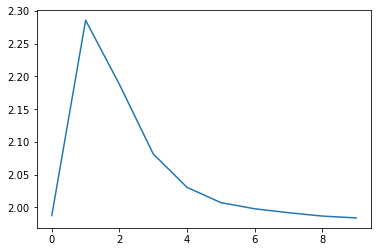

In [195]:
epochs=10

mean_error = []
for epoch in range(epochs):
  mean_error.append(np.mean(errors))
  errors = []
  for batch_i, batch in enumerate(data_loader):
    batch_x = batch[0] # features
    batch_y = batch[1] # alvos
    
    y_hat = mnist_mlp(batch_x)
    
    loss = cross_entropy_loss(y_hat, batch_y)
    
    errors.append(loss.item())
    
    optm.zero_grad() # zerar para realizar o backprop.
    loss.backward()
    
    optm.step()
    

#   print("""
#   Epoch: {}
#     Mean Loss {}""".format(epoch, mean_error))
  
plt.plot(range(len(mean_error)), mean_error)

Por enquanto só conseguimos medir o quanto a rede esta se adequando o nosso dataset de treino

In [0]:
reshaped_test = test.data.view(-1,28*28).float()
epoch_test_x = reshaped_test[:1000]
epoch_test_y = test.targets[:1000]

In [197]:
y_hat_test = mnist_mlp(epoch_test_x)
y_hat_test

tensor([[0.0095, 0.0050, 0.0235,  ..., 0.9950, 0.0153, 0.9897],
        [0.9908, 0.9932, 0.9930,  ..., 0.0060, 0.9936, 0.0016],
        [0.9908, 0.9932, 0.9930,  ..., 0.0060, 0.9936, 0.0016],
        ...,
        [0.9908, 0.9932, 0.9930,  ..., 0.0060, 0.9936, 0.0016],
        [0.0096, 0.0051, 0.0238,  ..., 0.9949, 0.0155, 0.9896],
        [0.0086, 0.0045, 0.0216,  ..., 0.9955, 0.0139, 0.9908]],
       grad_fn=<SigmoidBackward>)

In [198]:
formated_y_hat_test = torch.argmax(y_hat_test, 1)
formated_y_hat_test

tensor([7, 8, 8, 8, 7, 8, 7, 7, 7, 7, 8, 8, 7, 8, 8, 8, 7, 7, 8, 7, 7, 7, 7, 8,
        7, 8, 7, 7, 8, 8, 2, 8, 8, 8, 7, 8, 7, 8, 8, 8, 8, 7, 7, 8, 8, 8, 8, 2,
        7, 7, 7, 8, 8, 8, 2, 8, 7, 8, 7, 8, 7, 8, 7, 8, 7, 7, 2, 7, 8, 8, 7, 8,
        8, 7, 8, 7, 8, 2, 7, 7, 7, 7, 8, 7, 8, 7, 7, 8, 7, 8, 8, 7, 7, 8, 8, 7,
        8, 7, 7, 7, 7, 8, 2, 7, 7, 7, 8, 8, 7, 7, 8, 6, 8, 7, 7, 7, 7, 7, 7, 2,
        8, 7, 7, 7, 7, 7, 8, 8, 8, 8, 7, 7, 8, 7, 8, 8, 8, 8, 7, 7, 7, 7, 8, 8,
        7, 8, 8, 8, 8, 8, 7, 8, 8, 8, 8, 8, 7, 8, 8, 7, 7, 7, 8, 7, 7, 8, 7, 8,
        8, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 8, 8, 8, 8, 8, 8,
        8, 7, 8, 6, 8, 7, 7, 8, 8, 7, 8, 8, 8, 8, 7, 8, 8, 7, 7, 8, 7, 8, 7, 8,
        8, 8, 8, 8, 7, 8, 8, 7, 8, 8, 8, 7, 8, 7, 8, 8, 8, 7, 2, 7, 2, 8, 7, 8,
        8, 8, 8, 7, 8, 7, 8, 7, 7, 8, 7, 8, 7, 8, 7, 2, 8, 8, 8, 8, 8, 8, 7, 7,
        8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 8, 2, 8, 8, 8, 7, 8, 8, 7, 8, 7, 7,
        8, 8, 6, 8, 7, 8, 8, 7, 8, 8, 8,

In [199]:
from sklearn.metrics import accuracy_score

accuracy_score(epoch_test_y, formated_y_hat_test)

0.178

## Normalizando e Redimensionando o input da Rede

In [0]:
def format_tensor_to_input(input_tensor):
  normalized = normalize(input_tensor.float(), (0.5,), (0.5,))
  return normalized.view(-1,28*28)

In [0]:
# Formatando dado de treinamento
formated_x = format_tensor_to_input(x)

In [0]:
# Formatando dado de teste
formated_test_x = format_tensor_to_input(test.data)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


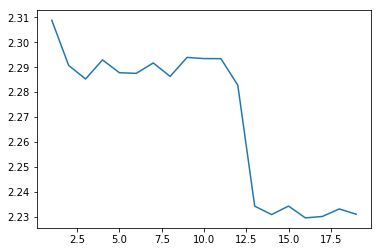

In [235]:
better_mlp = nn.Sequential(
    nn.Linear(28*28,28*28), # entrada e saída de neuronios
    nn.ReLU(), # ativação
    nn.Linear(28*28,10), # entrada e saída de neuronios
    nn.Sigmoid(), # ativação
)

optm = torch.optim.RMSprop(better_mlp.parameters(), lr=0.001)
dataset = TensorDataset(formated_x, y)
data_loader = DataLoader(dataset, batch_size=128)


epochs=20

mean_error = []
errors = []
for epoch in range(epochs):
  mean_error.append(np.mean(errors))
  errors = []
  for batch_i, batch in enumerate(data_loader):
    batch_x = batch[0] # features
    batch_y = batch[1] # alvos
    
    y_hat = better_mlp(batch_x)
    
    loss = cross_entropy_loss(y_hat, batch_y)
    
    errors.append(loss.item())
    
    optm.zero_grad() # zerar para realizar o backprop.
    loss.backward()
    
    optm.step()
    

#   print("""
#   Epoch: {}
#     Mean Loss {}""".format(epoch, mean_error))
  
plt.plot(range(len(mean_error)), mean_error)

In [236]:
y_hat_test = better_mlp(formated_test_x)

formated_y_hat_test = torch.argmax(y_hat_test, 1)


accuracy_score(test.targets, formated_y_hat_test)

0.1894